# **Task 1**

# **Part A**
# **1. Load the data into a Pandas DataFrame**

In [17]:
import pandas as pd
import csv
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv("./datasets/sales_data.csv", encoding="ISO-8859-1")

In [19]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_columns", None)
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# **Part B**
# **2. Calculate the total sales for each product.**

In [20]:
total_sales_each_product = df.groupby("PRODUCTLINE")['SALES'].sum().reset_index()
total_sales_each_product


,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
1,Motorcycles,1166388.34
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47
5,Trucks and Buses,1127789.84
6,Vintage Cars,1903150.84


# **Part C**
# **3. Calculate the average quantity sold in the year 2003, 2004 and 2005.**

In [21]:
df["YEAR_ID"].unique()

array([2003, 2004, 2005])

In [22]:
avg_qty_per_year = df.groupby(['YEAR_ID', 'PRODUCTLINE'])['QUANTITYORDERED'].mean().unstack()
avg_qty_per_year

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
YEAR_ID,,,,,,,
2003,34.079235,34.302752,35.247059,35.111111,35.714286,36.872727,33.954751
2004,34.882353,34.695122,34.310559,34.234783,35.216216,35.225352,35.035211
2005,38.371069,38.517241,36.783333,35.421053,34.083333,35.081633,35.441176


# **Part D**
# **4. Bar chat to display the quantity of products yearwise.**

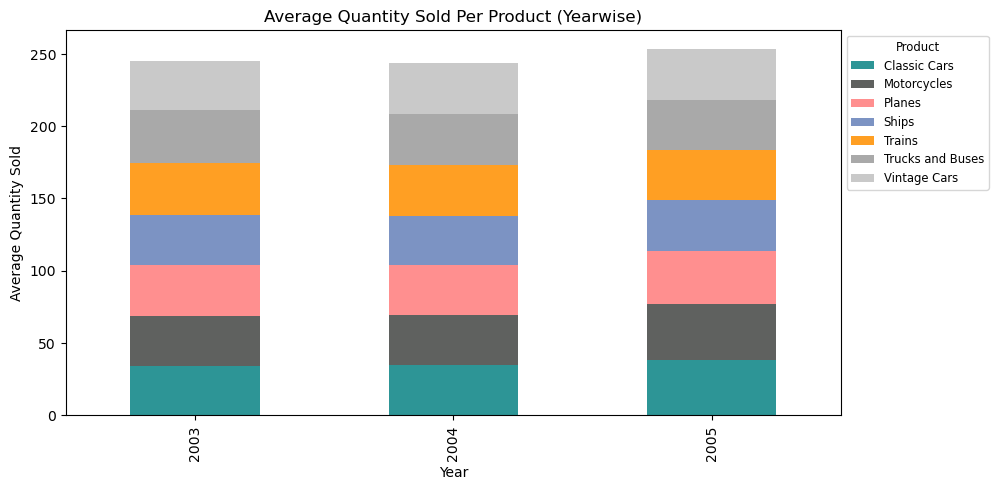

In [23]:
avg_qty_per_year.plot(kind='bar', stacked=True, figsize=(10, 5), color=['#2D9596','#5F615F','#FF8F8F','#7C93C3','#FF9F23','#A9A9A9', '#C9C9C9'])
plt.title('Average Quantity Sold Per Product (Yearwise)')
plt.xlabel('Year')
plt.ylabel('Average Quantity Sold')
plt.legend(title='Product', bbox_to_anchor=(1,1), loc='upper left', ncol=1, fontsize='small', title_fontsize='small')
plt.show()


# **Part E**
# **5. Scatter chart showing the trend of the average quantity sold per year.**


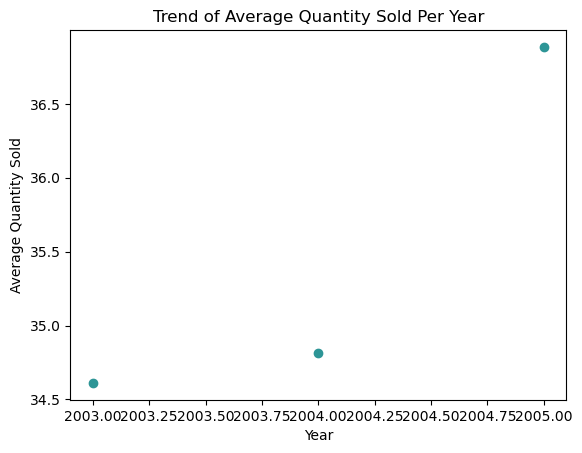

In [24]:
avg_qty_overall = df.groupby('YEAR_ID')['QUANTITYORDERED'].mean()
plt.scatter(avg_qty_overall.index, avg_qty_overall.values, marker='o', color='#2D9596', label='Overall', alpha=1.0)
plt.title('Trend of Average Quantity Sold Per Year')
plt.xlabel('Year')
plt.ylabel('Average Quantity Sold')
plt.show()

# **Task 2**

# **Part A**
# **1. Load all the xml files and show their root tag**

In [25]:
xml_files = [file for file in os.listdir('./datasets') if file.endswith('.xml')]
xml_files.sort()
root_tags = []
for file in xml_files:
      tree = ET.parse(os.path.join('./datasets', file))
      root = tree.getroot()
      root_tags.append(root.tag)
      
root_tags

['CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset',
 'CTIMinerDataset']

# **Part B**
# **2. Extract the data from xml files and remove none values from it**

In [26]:
data = []
for file in xml_files:
    tree = ET.parse(os.path.join('./datasets', file))
    root = tree.getroot()
    for item in root.iter('item'):
       category = item.find('category').text
       value = item.find('value').text
       if category is not None and value is not None:
          data.append((category, value))   
data


[('Other', 'Ashmore_Impact-of-Alleged-Russian-Cyber-Attacks(Jan-18-09).pdf'),
 ('Network activity', 'prygi.blogspot.com'),
 ('Network activity', 'transnet.act.nato.int'),
 ('Network activity', 'www.times.spb.ru'),
 ('Network activity', 'lumen.cgsccarl.com'),
 ('Network activity', 'translate.google.ru'),
 ('Network activity', 'www.wmdinsights.com'),
 ('Network activity', 'www.euractiv.com'),
 ('Network activity', 'stu.neva.ru'),
 ('Network activity', 'CNN.com'),
 ('Network activity', 'Infopass.net'),
 ('Network activity', 'www.businessweek.com'),
 ('Network activity', 'www.iht.com'),
 ('Network activity', 'nato.int'),
 ('Network activity', 'EurActiv.com'),
 ('Network activity', 'search.ebscohost.com'),
 ('Network activity', 'www.osce.org'),
 ('Network activity', 'ec.europa.eu'),
 ('Network activity', 'America.gov'),
 ('Network activity', 'www.opensource.gov'),
 ('Network activity', 'conventions.coe.int'),
 ('Network activity', 'www.nato.int'),
 ('Network activity', 'www.guardian.co.uk')

# **Part C**
# **3. Store the data of “category” and “values” tag in a list**

In [27]:
categories = [row[0] for row in data]
values = [row[1] for row in data]

# **Part D**
# **4. Now store this list in a newly created csv file named “CTI_cat_val_dataset”**

In [28]:
with open('CTI_cat_val_dataset.csv', 'w', newline='') as file:
     writer = csv.writer(file)
     writer.writerow(['Category', 'Value'])
     writer.writerows(data)

# **Task 3**

In [29]:
df=pd.read_csv('CTI_cat_val_dataset.csv')
df

,Category,Value
0,Other,Ashmore_Impact-of-Alleged-Russian-Cyber-Attack...
1,Network activity,prygi.blogspot.com
2,Network activity,transnet.act.nato.int
3,Network activity,www.times.spb.ru
4,Network activity,lumen.cgsccarl.com
...,...,...
74089,Network activity,www.surveymonkey.com
74090,Network activity,www.cnet.com
74091,Network activity,cdn2.hubspot.net
74092,Network activity,us.norton.com


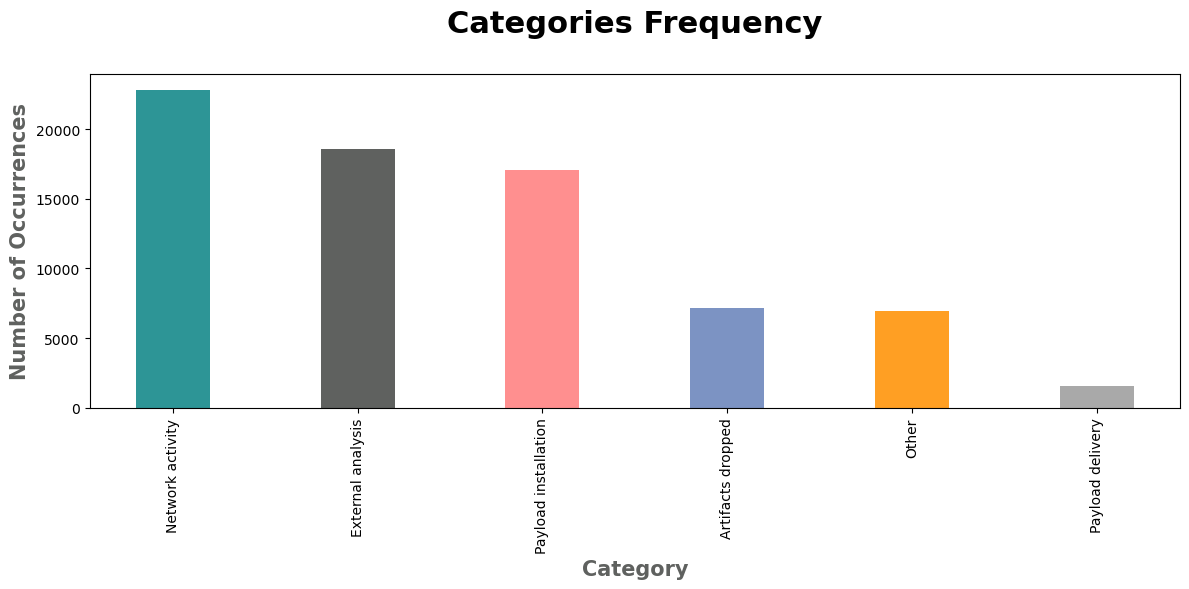

In [30]:
plt.figure(figsize=(12,6))
category=df['Category'].value_counts()
category.plot(kind='bar',color=['#2D9596','#5F615F','#FF8F8F','#7C93C3','#FF9F23','#A9A9A9'],width=0.4)
plt.xlabel('Category',fontsize=15,fontweight='bold',c='#5F615F')
plt.ylabel('Number of Occurrences',fontsize=15,fontweight='bold',c='#5F615F')
plt.title('Categories Frequency\n',fontsize=22,fontweight='bold')
plt.tight_layout()
plt.show()